In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
%matplotlib inline

In [2]:
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',\
           'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
data = pd.read_csv('cleveland.csv', names=columns)

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Removing missing values:

In [4]:
for col in data.columns:
    if '?' in data[col].values.tolist():
        print(col)

ca
thal


In [5]:
data['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [6]:
data['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [7]:
data.shape

(303, 14)

In [8]:
data = data[data['ca'] != '?']
data = data[data['thal'] != '?']

In [9]:
data.shape

(297, 14)

## Chosen attributes for various data types:

- **Categorical/nominal: sex** (gender)
- **Ordinal: slope** (the slope of the peak exercise ST segment)
- **Discrete quantitative : age** (age in years) 
- **Continuous quantiative: trestbps** (resting blood pressure) 

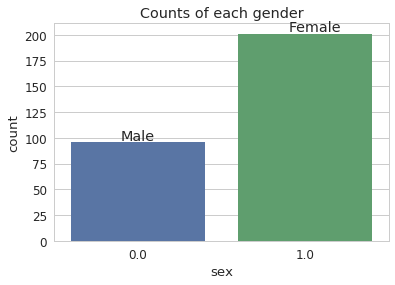

In [10]:
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
def plot_age(data):
    fig = sns.countplot(x="sex", data=data)
    labels = ['Male', 'Female']
    for i, p in enumerate(fig.patches):
            fig.annotate('{}'.format(labels[i]), (p.get_x()+0.3, p.get_height()+2))
    return fig
fig = plot_age(data)
_ = fig.set_title('Counts of each gender')

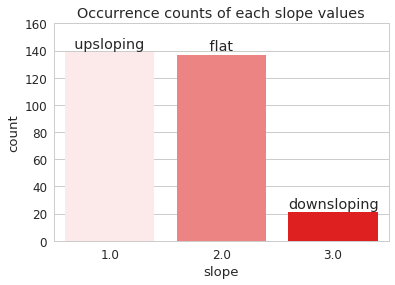

In [11]:
sns.set_style("whitegrid")
def plot_slope(data):
    with sns.color_palette(sns.light_palette("red", 3)):
        fig = sns.countplot(x='slope', data=data)
        labels = ['  upsloping  ', '       flat','downsloping']
        for i, p in enumerate(fig.patches):
            fig.annotate('{}'.format(labels[i]), (p.get_x(), p.get_height()+3))
        return fig
fig = plot_slope(data)
_ = fig.set_title('Occurrence counts of each slope values')
_ = fig.axes.set_ylim(0, 160)

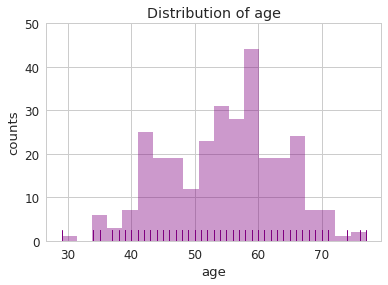

In [12]:
sns.set_style(None)
def plot_age(data):
    fig = sns.distplot(data['age'], kde=False, rug=True, bins=20, color='purple')
    return fig
fig = plot_age(data)
_ = fig.set_title('Distribution of age')
_ = fig.axes.set_ylim(0, 50)
_ = fig.set_ylabel('counts')

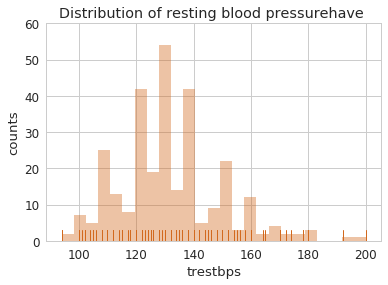

In [13]:
def plot_testbps(data):
    fig = sns.distplot(data['trestbps'], kde=False, rug=True, bins=25, color='chocolate')
    return fig
fig = plot_testbps(data)
_ = fig.axes.set_ylim(0, 60)
_ = fig.set_ylabel('counts')
_ = fig.set_title('Distribution of resting blood pressurehave ')

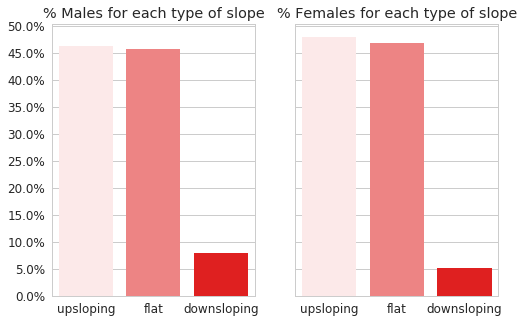

In [14]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
f.set_size_inches(8, 5)
slope_male = data[data['sex'] == 1]['slope']
count_male = Counter(slope_male.values)
x = ['upsloping', 'flat', 'downsloping']
y_male = [count_male[i] for i in [1.0, 2.0, 3.0]]
y_male = ((np.array(y_male) / slope_male.shape[0]) * 100)

slope_female = data[data['sex'] == 0]['slope']
count_female = Counter(slope_female.values)
y_female = [count_female[i] for i in [1.0, 2.0, 3.0]]
y_female = ((np.array(y_female) / slope_female.shape[0]) * 100)
with sns.color_palette(sns.light_palette("red", 3)):
    sns.barplot(x=x, y=y_male, ax=ax1)
    sns.barplot(x=x, y=y_female, ax=ax2)
ax1.set_yticks(np.arange(0, 55, 5))
_ = ax1.set_yticklabels(['{:3.1f}%'.format(x) for x in ax1.get_yticks()])
_ = ax1.set_title('% Males for each type of slope')
_ = ax2.set_title('% Females for each type of slope')

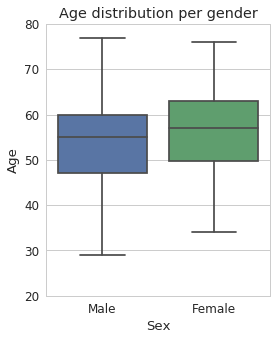

In [15]:
data['named_sex'] = ['Male' if x == 1 else 'Female' for x in data['sex'].values]
f = plt.figure()
fig = sns.boxplot(x='named_sex', y='age', data=data)
labels = ['males', 'females']
_ = fig.set_yticks(np.arange(20, 90, 10))
_ = f.add_subplot(fig)
_ = f.set_size_inches(4, 5)
_ = fig.set_xlabel('Sex')
_ = fig.set_ylabel('Age')
_ = fig.set_title('Age distribution per gender')

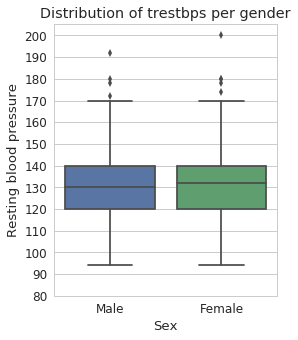

In [16]:
f = plt.figure()
fig = sns.boxplot(x='named_sex', y='trestbps', data=data)
labels = ['males', 'females']
_ = fig.set_yticks(np.arange(80, 210, 10))
_ = f.add_subplot(fig)
_ = f.set_size_inches(4, 5)
_ = fig.set_xlabel('Sex')
_ = fig.set_ylabel('Resting blood pressure')
_ = fig.set_title('Distribution of trestbps per gender')